In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
contri_value = np.load("/liujinxin/lam/lulu_ms/Result/Poisson/expr_1_11_subnet_9_msdnn_2nd_p_s_mu_15/contribution.npy",allow_pickle=True)

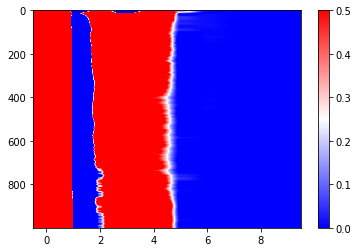

In [10]:
plt.imshow(contri_value, cmap='bwr', aspect='auto',vmin=0,vmax=0.5)
plt.colorbar()

归一化

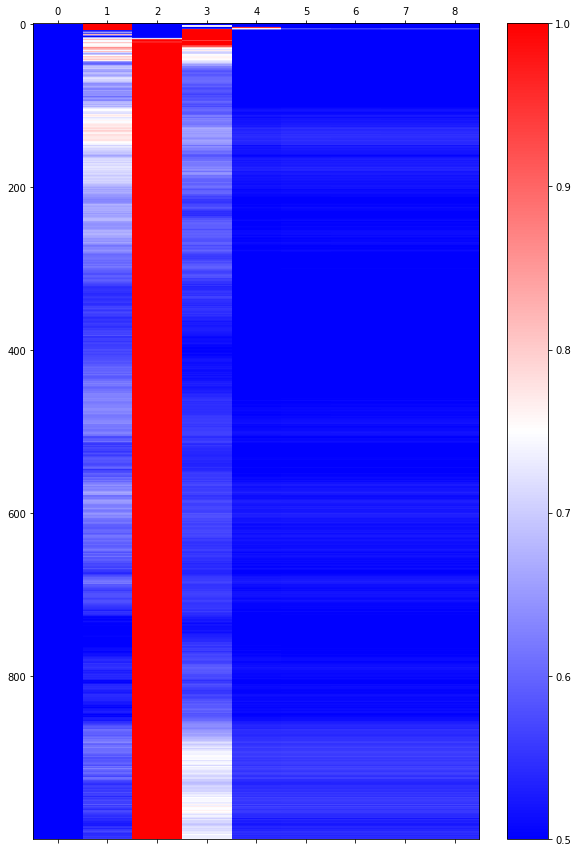

In [20]:
min_values = np.amin(contri_value[:,1:], axis=1, keepdims=True)
max_values = np.amax(contri_value[:,1:], axis=1, keepdims=True)
epsilon= 1e-10
range_values = max_values - min_values + epsilon  # 加上 epsilon 避免分母为零
contri_normalized = (contri_value[:,1:] - min_values) / range_values

fig, ax = plt.subplots(figsize=(10, 15))  # Create a figure and an axes with specified figsize
im = ax.matshow(contri_normalized, cmap='bwr', aspect='auto', vmin=0.5, vmax=1)  # Use imshow here instead of matshow

plt.colorbar(im, ax=ax)  # Add colorbar, associating with the created axes



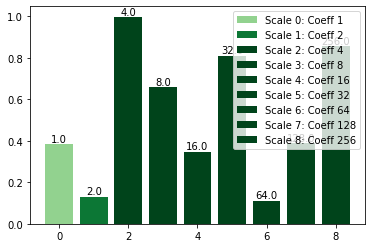

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Example omega_value and contri_normalized for demonstration
omega_value = np.array([[0, 1, 2, 4, 8, 16, 32, 64, 128, 256]])  # Adjust this based on your actual data
contri_normalized = np.random.rand(10)  # Dummy data for contribution values
epoch = 0  # Example epoch

# Normalization
omega_norm = Normalize(vmin=min(np.log10(omega_value[epoch, 1:])), vmax=max(np.log10(omega_value[epoch, 1:])))
c_map = cm.Greens  # Using a built-in green colormap

fig, ax = plt.subplots()
for i, (contrib, coeff) in enumerate(zip(contri_normalized, omega_value[epoch, 1:])):
    coeff_norm = omega_norm(coeff)
    ax.bar(i, contrib, color=c_map(coeff_norm),
           label=f'Scale {i}: Coeff {coeff}')
    ax.text(i, contrib, f'{coeff:.1f}',
            ha='center', va='bottom', fontsize=10)

plt.legend()
plt.show()


In [6]:

def create_subplot_moe_grid2(nrow,ncol):
    fig = plt.figure(figsize=(2.2 * ncol * 3, 1.8 * nrow * 3))
    gs = GridSpec(nrow, ncol, figure=fig, hspace=0.4, wspace=0.3)
    
    # First row: one subplot per column, excluding the last two columns which are merged
    for c in range(ncol - 2):  # Adjust to exclude last two columns
        ax =fig.add_subplot(gs[0, c])
        self.axes.append(ax)

    # Second row: same as the first row
    for c in range(ncol - 2):  # Adjust to exclude last two columns
        ax =fig.add_subplot(gs[1, c])
        axes.append(ax)

    # Third row: Adjust to span all columns but merge the last two into one large subplot
    for c in range(ncol - 2):  # Create subplots for the first three columns
        ax = fig.add_subplot(gs[2, c])
        axes.append(ax)

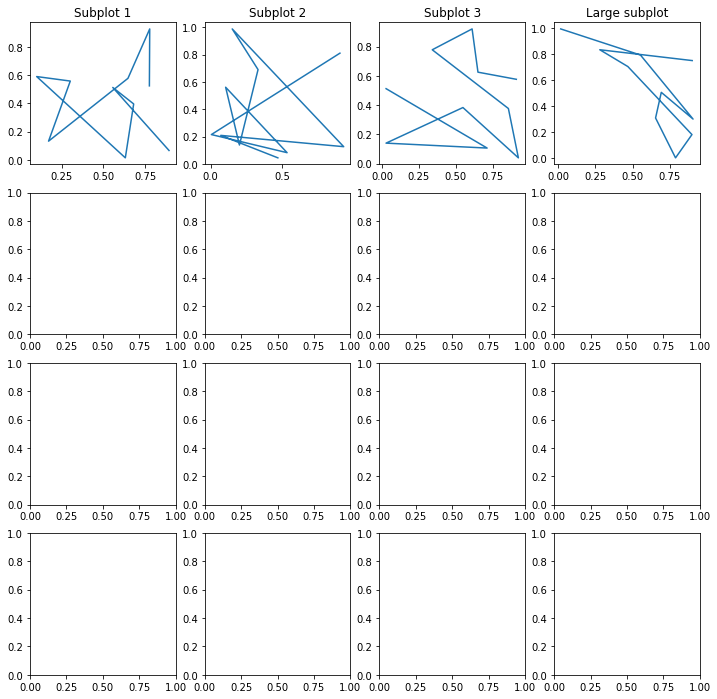

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

class PlotMOE:
    def __init__(self):
        self.fig = None
        self.axes = None

    def _create_subplot_moe_grid2(self, nrow, ncol):
        self.fig, self.axes = plt.subplots(nrow, ncol, figsize=(ncol * 3, nrow * 3))
        self.axes = self.axes.flatten() # 使得axes可以一维索引

    def plot_moe_load_2d(self, nrow, ncol, **kwargs):
        if self.fig is None or len(self.axes) != nrow * ncol:
            self._create_subplot_moe_grid2(nrow=nrow, ncol=ncol)

        # 假设sub_omega已经在kwargs中给出
        sub_omega = kwargs.get("sub_omega", np.random.rand(10, 10))

        # 计算并绘图的相关参数


        for i, ax in enumerate(self.axes):
            if i < 3: # 前三个子图
                ax.plot(np.random.rand(10), np.random.rand(10))
                ax.set_title(f"Subplot {i+1}")
            elif i == 3: # 第四个子图，占据第二行
                ax.plot(np.random.rand(10), np.random.rand(10))
                ax.set_title("Large subplot")
                break # 绘制完毕，跳出循环

        # 另一个fig，3行5列
        if nrow == 3 and ncol == 5:
            for i in range(9): # 前9个子图
                if i < len(self.axes):
                    self.axes[i].plot(np.random.rand(10), np.random.rand(10))
                    self.axes[i].set_title(f"Grid {i+1}")
            # 特殊处理最后的大图
            if len(self.axes) > 9:
                # 假设大图占据最后一列的所有行，这里简化为只修改标题
                self.axes[9].set_title("Large Grid Plot")

    # 其他方法...

# 示例使用
plot_moe = PlotMOE()
plot_moe.plot_moe_load_2d(4, 4,  sub_omega=np.random.rand(10))  # 为简化，solver和model需要您自己定义
